# Konstruktion von ebenen Parameterkurven
In der Vorlesung hatten wir den Hauptsatz für ebene Parameterkurven formuliert. Wir können ebene Parameterkurven mit einem gegebenen Krümmungsverlauf konstruieren. Neben der Krümmung müssen wir noch angeben in welchem Punkt die spur der Kurve beginnen soll und wie die Tangente in diesem Punkt lautet.

## Formulierung als gewöhnliche Differentialgleichungen
Der Hauptsatz beschreibt die Definition der konstruierten Kurve mit Hilfe von bestimmten Integralen. Wir können solche Integrale mit Hilfe von Funktion aus SciPy berechnen. Solche Algorithmen nennen wir Quadrator-Verfahren, wir finden die entsprechenden Funktionen im Package scipy.integrate. Solche Quadraturformeln sind aber im Allgemeinen rechenintensiv. Auch SymPy enthält natürlich entsprechende Lösungen, aber hier ist die Performanz noch langsamer.

Ein Ausweg ist, den Hauptsatz der Differential- und Integralrechnung auszunutzen und die Formeln aus dem Hauptsatz für ebene Parameterkurven als Gleichungen zu schreiben, in denen nicht nur die drei konstruierten Funktionen, sondern auch ihre ersten Ableitungen auftreten. Natürlich kann man sich fragen, was wir damit gewonnen haben. Aber für solchte sogenannte gewöhnliche Differentialgleichungen gibt es sehr stabile und effizienten Verfahren, die in diesem Umfeld meist**Solver** gemammt werdem- Wor fomdem doese Verfajrem o, Üaclte sccipy.ode- Die Abkürzung *ode* kommt vom englischen Begriff **ordinary differential equations** - die Übersetzung von gewöhnliche Differentialgleichungen.

In diesem Notebook betrachten wir kurz diese Solver an Hand eines kleinen Beispiels und formulieren dann den Hauptsatz als ein System von drei gewöhnlichen Differentialgleichungen, die wir mit SciPy lösen.

## Gewöhnliche Differentialgleichungen
Die Funktion, die eine solche Differentialgleichung löst wird in dieser Kontext immer mit *y* bezeichnet. Eine ganz einfache gewöhnliche Differentialgleichung ist dann die Gleichung

y'=y

Mit anderen Worten: wir suchen die Funktion y(x), die sich selbst als Ableitung hat. Das wissen wir natürlich, das ist die Exponentialfunktion. Wir werden sogenannte **Anfangswertprobleme** oder auf Englisch **initial value problems** lösen. Damit ist gemeint, dass wir neben der Differentialgleichung einen Anfangswert besitzen:

y'=y, y(0) = 1

Die rechte Seite einer allgemeinen gewöhnlichen Differentialgleichung schreiben wir als F(y, x). Wie schon festgelegt ist y die Funktion, die wir suchen. Und x ist die Variable, die wir in y einsetzen. Für unser einfaches Beispiel der Exponentialfunktion ist F gegeben als F(x, y) = y(x). Allgemein ist ein Anfangsproblem also so formuliert:

y*(x) = F(x, y), y(x_0) = y_0.

Die Algorithmen, die eine solche Gleichung lösen bestimmen eine Näherung von y als Polygonzug. Das reicht meistern in den Anwendungen. Insbesondere können wir den Polygonzug für eine grafische Ausgabe der Lösung nutzen.

Wir werden den Solver *scipy.integrate.solve_ivp* einsetzen und die berechnete Näherung mit Matplotlib ausgeben. Also laden wir diese Packages und bereiten anschließend den Aufruf des Solvers vor.

In [12]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

Die Funktion solve_ivp erwartet eine Funktion, die die rechte Seite, also F, realisiert. Und wir müssen einen Anfangswert übergeben. Schauen wir in die Dokumentation von SciPy erkennen wir, dass wir ein Feld mit Anfangswerten übergeben müssen. Das ist bei einer Gleichung natürlich nicht notwendig, wir müssen aber auch in diesem Fall ein Feld erzeugen und übergeben. Das kommt uns im Fall von mehr als einer Gleichung, den wir ja noch betrachten werden, sehr zu Nutze.

Als Beispiel lösen wir das folgende Anfangswertproblem:

y' = -0.5*y, y(0) = 2

In [13]:
def F(x, y):
    return -0.5*y

initialvalue = 2.0
start = np.array([initialvalue])

Jetzt müssen wir noch angeben für welche x-Werte wir die Lösung suchen. Die linke Grenze dieses Intervalss ist natürlich durch den Anfangswert gegeben, also ist hier
x0=0. Wir entscheiden und für x1=10, damit wir den Verlauf der Lösung gut erkennen können.

In [11]:
x0 = 0.0
x1 = 10.0

Jetzt können wir den Solver aufrufen. Der Rückgabewert dieser Funktion ist eine Struktur. Insbesondere finden wir wie üblich in SciPy eine logische Variable,
die angibt, ob die Berechnung korrekt verlaufen ist.

In [6]:
sol = integrate.solve_ivp(fun=F,
                          t_span=[x0, x1],
                          y0=start)

Bei diesem einfachen Beispiel sollten wir einen erfolgreichen Durchlauf erwarten können. Die Solver für solche Probleme erstellen einen Polygonzug, wir bereits erwähnt. Allerdings s
sind die x-Werte für die berechneten Punkten nicht äquidistant. Die Verfahren versuchen dort wo die Lösung flach ist große Schritte zu machen und dort wo die Lösung steil ist eher kleiner
Schritte zu machen. Wir können der Funktion *solve_ivp* ein Feld mit x-Werten übergeben, an denen wir die Lösung gerne auswerten würden. Das Resampling von der berechneten
Lösung auf diese äquidistanten Werte erledigt SciPy für uns. Wir erzeugen eine solches Feld mit linspace und rufen die Funktion nochmals auf. 
Wir können gleich mehr als einen Anfangswert übergeben. Damit wir die grafische Ausgabe wie gewohnt durchführen können speichern wir die y-Werte unserer Lösung auf einem neuen Feld.

In [8]:
n = 50
eval = np.linspace(x0, x1, n)

sol = integrate.solve_ivp(fun=F,
                          t_span=[x0, x1],
                          y0=start,
                          t_eval=eval)
if sol.success:
    y = sol.y[0, :]

Jetzt können wir mit dem Polygonzug, der auf den Feldern x und y steht eine grafische Ausgabe erstellen. Wir markieren auch die Anfangsbedingung, um das Ergebnis zu überprüfen.
Das Beispiel beschreibt den exponentiellen Zerfall.

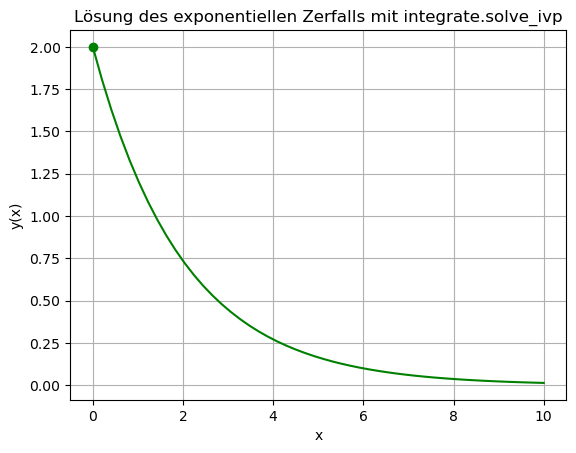

In [14]:
fig = plt.figure()
plt.grid(True)

plt.plot(x0, start[0], 'go')
plt.plot(eval, y, 'g-')
plt.title('Lösung des exponentiellen Zerfalls mit integrate.solve_ivp')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

## Konstruktion einer ebenen Parameterkurve mit vorgegebener Krümmung

Die Formulierung der Konstruktion der Kurve mit einem vorgegebenen Krümmungsverlauf finden wir in den Handouts. Wir erhalten drei gewöhnliche Differentialgleichungen,
ein System von Differentialgleichungen. Für alle drei Funktionen die wir suchen benötigen wir Anfangswerte und natürlich müssen wir eine Funktion implementieren, die
den gewünschten Krümmungsverlauf beschreibt. Diese nennen wir wie auf den Folien k.

Als erstes Beispiel konstruieren wir einen Kreis umd den Ursprung mit Radius 2. Er soll im Punkt (2,0) beginnen und die Tangente soll in Richtung der y-Achse zeigen. Wir legen das gleich so an, dass wir auch andere Werte für den Radius verwenden können. Mit k können wir anschließend die rechte Seite des Differentialgleichungssystems implementieren.
Wir nennen diese Funktion wie gewohnt F. Jetzt geben wir in dieser Funktion einen Vektor der Länge 3 zurück - wir haben ja drei Gleichungen.-
Das Intervall [x0, x1] definiert jetzt das gewünschte Parameterintervall der konstruierten Kurve.

In [16]:
r = 2.0


def k(s):
    return 1.0/r


def F(s, y):
    return [np.cos(y[2]), np.sin(y[2]), k(s)]

Der Rest ist wieder analog zu unserem einfachen Beispiel realisiert. Am Ende holen wir die Lösung ab und verwenden die ersten beiden Komponenten für die grafische 
Ausgabe der Parameterkurve.

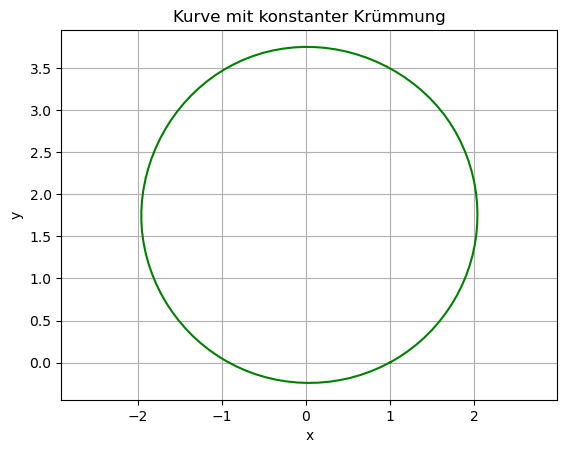

In [18]:
a = 0.0
b = 4.0*np.pi
n = 100
eval = np.linspace(a, b, n)

ivs = np.array([1.0, 0.0, k(a)])
sol = integrate.solve_ivp(fun=F,
                          t_span=[a, b],
                          y0=ivs,
                          t_eval=eval)

if sol.success:
    y1 = sol.y[0, :]
    y2 = sol.y[1, :]
    y3 = sol.y[2, :]
    
fig, axs = plt.subplots(1, 1)
axs.axis('equal')
plt.grid(True)

plt.plot(y1, y2, 'g-')
plt.title('Kurve mit konstanter Krümmung')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Wir holen auch die dritte Komponente der berechneten Lösung ab. Diese könntenw wir auch für eine grafische Ausgabe nutzen - aber das Ergebnis ist eindeutig, wir haben einen Kreis mit Radius 2 konstruiert.

Jetzt konstruieren wir die Klothoide als Übergang zwischen einer Linie und einem Kreis. Dazu implementieren wir eine neue Funktion k, wie in den Folien gezeigt.

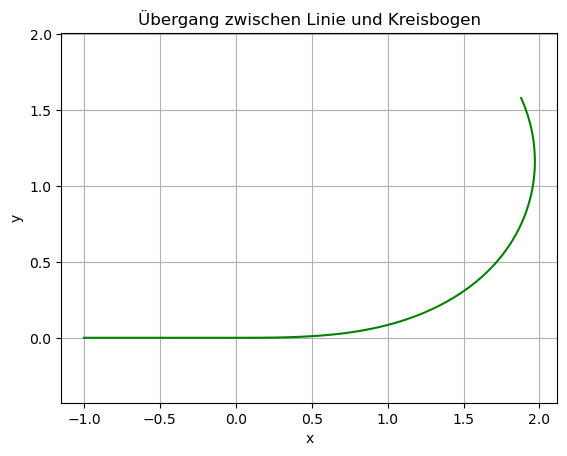

In [22]:
def k(s):
    return np.where(s <= 0.0, 0.0,
                    np.where(s <= 2.0, 0.5*s, 1.0))


a = -1.0
b = 3.0
n = 100
eval = np.linspace(a, b, n)

x0 = -1.0
y0 = 0.0
theta0 = 0.0
ivs = np.array([x0, y0, theta0])
sol = integrate.solve_ivp(fun=F,
                          t_span=[a, b],
                          y0=ivs,
                          t_eval=eval)

if sol.success:
    xsol = sol.y[0, :]
    ysol = sol.y[1, :]
    
fig, axs = plt.subplots(1, 1)
axs.axis('equal')
plt.grid(True)

plt.plot(xsol, ysol, 'g-')
plt.title(
    'Übergang zwischen Linie und Kreisbogen')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Weitere Konstruktionen
Die Klothoide, die wir eben konstruiert haben hat Anwendungen in der Straßenplanung. Wir können natürlich beliebige Funktionen k implementieren, was wir jetzt 
an Hand von zwei Beispielen auch durchführen werden. Damit können wir jetzt ganze Bildergalerien füllen :-)

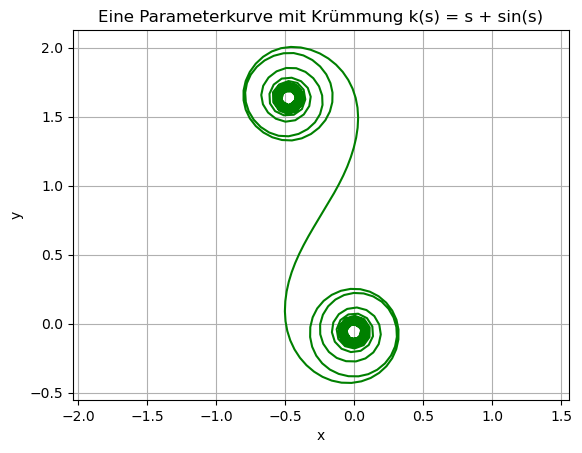

In [25]:
def k(s):
    return (s + np.sin(s))

a = -18.0
b = 18.0
n = 500
eval = np.linspace(a, b, n)

x0 = 0.0
y0 = 0.0
theta0 = 0.0

ivs = np.array([x0, y0, theta0])
sol = integrate.solve_ivp(fun=F,
                          t_span=[a, b],
                          y0=ivs,
                          t_eval=eval)

if sol.success:
    xsol = sol.y[0, :]
    ysol = sol.y[1, :]
    
fig, axs = plt.subplots(1, 1)
axs.axis('equal')
plt.grid(True)

plt.plot(xsol, ysol, 'g-')
plt.title(
    'Eine Parameterkurve mit Krümmung k(s) = s + sin(s)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

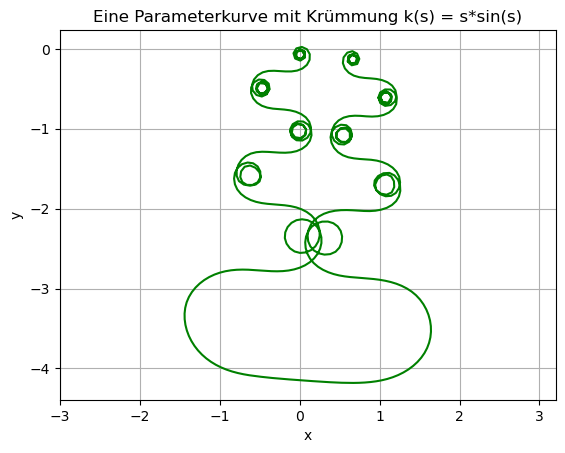

In [29]:
def k(s):
    return (s  * np.sin(s))

a = -18.0
b = 18.0
n = 500
eval = np.linspace(a, b, n)

x0 = 0.0
y0 = 0.0
theta0 = 0.0

ivs = np.array([x0, y0, theta0])
sol = integrate.solve_ivp(fun=F,
                          t_span=[a, b],
                          y0=ivs,
                          t_eval=eval)

if sol.success:
    xsol = sol.y[0, :]
    ysol = sol.y[1, :]
    
fig, axs = plt.subplots(1, 1)
axs.axis('equal')
plt.grid(True)

plt.plot(xsol, ysol, 'g-')
plt.title(
    'Eine Parameterkurve mit Krümmung k(s) = s*sin(s)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()